**Group Members**

1.Orawee Pirugjanyakun

2.Nonthaporn Phrommet

3.Jaksavat Boonarak

# **Load Dependencies**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 8.5 MB/s 
     |████████████████████████████████| 2.0 MB 40.6 MB/s 
     |████████████████████████████████| 14.6 MB 123 kB/s 
     |████████████████████████████████| 1.3 MB 45.4 MB/s 
     |████████████████████████████████| 80 kB 12.2 MB/s 
     |████████████████████████████████| 111 kB 54.1 MB/s 
     |████████████████████████████████| 56 kB 6.0 MB/s 
     |████████████████████████████████| 1.7 MB 42.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 271 kB 61.3 MB/s 
     |████████████████████████████████| 6.8 MB 44.4 MB/s 
     |████████████████████████████████| 167 kB 61.3 MB/s 
     |████████████████████████████████| 261 kB 57.2 MB/s 
     |████████████████████████████████| 10.1 MB 42.2 MB/s 
     |████████████████████████████████| 3.1 MB 56.3 MB/s 
     |████████████████

In [ ]:
import pandas as pd
from pycaret.clustering import *

# **1. Load Data**

In [ ]:
# 1. google connect
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CRM/Supermarket Data.csv')
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SHOP_WEEK                 956574 non-null  int64         
 1   SHOP_DATE                 956574 non-null  datetime64[ns]
 2   SHOP_WEEKDAY              956574 non-null  int64         
 3   SHOP_HOUR                 956574 non-null  int64         
 4   QUANTITY                  956574 non-null  int64         
 5   SPEND                     956574 non-null  float64       
 6   PROD_CODE                 956574 non-null  object        
 7   PROD_CODE_10              956574 non-null  object        
 8   PROD_CODE_20              956574 non-null  object        
 9   PROD_CODE_30              956574 non-null  object        
 10  PROD_CODE_40              956574 non-null  object        
 11  CUST_CODE                 802892 non-null  object        
 12  CU

In [ ]:
# 2. Read own drive
df = pd.read_csv('/content/Supermarket Data.csv')
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df.tail(5)

In [ ]:
print(len(df))

118130


In [ ]:
df['CUST_LIFESTAGE'].value_counts().sum()

88098

In [ ]:
# one hot encoding
cath_feature = pd.DataFrame(df,columns = ['BASKET_DOMINANT_MISSION','BASKET_TYPE','CUST_LIFESTAGE','CUST_PRICE_SENSITIVITY'])

df1 = pd.get_dummies(cath_feature)
df3 = df.join(df1)
df3.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,BASKET_DOMINANT_MISSION_Fr,BASKET_DOMINANT_MISSION_Fresh,BASKET_DOMINANT_MISSION_Grocery,BASKET_DOMINANT_MISSION_Mixed,BASKET_DOMINANT_MISSION_Nonfood,BASKET_DOMINANT_MISSION_XX,BASKET_TYPE_Full Shop,BASKET_TYPE_Small Shop,BASKET_TYPE_Top Up,BASKET_TYPE_XX,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,CUST_PRICE_SENSITIVITY_LA,CUST_PRICE_SENSITIVITY_MM,CUST_PRICE_SENSITIVITY_UM,CUST_PRICE_SENSITIVITY_XX
0,200732,2007-10-05,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,200733,2007-10-10,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,200741,2007-12-09,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,200731,2007-09-29,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,200737,2007-11-10,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info

<bound method DataFrame.info of         SHOP_WEEK  SHOP_DATE  ...  STORE_FORMAT  STORE_REGION
0          200732 2007-10-05  ...            LS           E02
1          200733 2007-10-10  ...            LS           E02
2          200741 2007-12-09  ...            LS           E02
3          200731 2007-09-29  ...            LS           E02
4          200737 2007-11-10  ...            LS           E02
...           ...        ...  ...           ...           ...
118125     200741 2007-12-04  ...            LS           E02
118126     200811 2008-05-05  ...            LS           E02
118127     200648 2007-01-25  ...            LS           E02
118128     200642 2006-12-13  ...            LS           E02
118129     200710 2007-04-30  ...           NaN           NaN

[118130 rows x 22 columns]>

# **2. Preparing Data - Prepare customer single view**

## Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


## Calculate features

In [ ]:
##prepare customer single view
df_csv = df_groupby = df3[df3['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  shop_hour = ('SHOP_HOUR', 'mean'),
                                                                                  quantity = ('QUANTITY' , 'sum')	,
                                                                                  basket_do_Fr = ('BASKET_DOMINANT_MISSION_Fr','sum'),
                                                                                  basket_do_Fresh = ('BASKET_DOMINANT_MISSION_Fresh','sum'),
                                                                                  basket_do_Grocery = ('BASKET_DOMINANT_MISSION_Grocery','sum'),
                                                                                  basket_do_Mixed = ('BASKET_DOMINANT_MISSION_Mixed','sum'),
                                                                                  basket_do_Nonfood = ('BASKET_DOMINANT_MISSION_Nonfood','sum'),
                                                                                  basket_do_XX = ('BASKET_DOMINANT_MISSION_XX','sum'),
                                                                                  basket_type_fullshop = ('BASKET_TYPE_Full Shop','max'),
                                                                                  basket_type_Small_Shop = ('BASKET_TYPE_Small Shop','max'),
                                                                                  basket_type_Top_Up = ('BASKET_TYPE_Top Up','max'),
                                                                                  CUST_LIFESTAGE_OA = ('CUST_LIFESTAGE_OA','max'),
                                                                                  CUST_LIFESTAGE_OF = ('CUST_LIFESTAGE_OF','max'),
                                                                                  CUST_LIFESTAGE_OT = ('CUST_LIFESTAGE_OT','max'),
                                                                                  CUST_LIFESTAGE_PE = ('CUST_LIFESTAGE_PE','max'),
                                                                                  CUST_LIFESTAGE_YA = ('CUST_LIFESTAGE_YA','max'),
                                                                                  CUST_LIFESTAGE_YF = ('CUST_LIFESTAGE_YF','max')
                                                                                  # CUST_PRICE_SENSITIVITY_LA	
                                                                                  # CUST_PRICE_SENSITIVITY_MM	
                                                                                  # CUST_PRICE_SENSITIVITY_UM	
                                                                                  # CUST_PRICE_SENSITIVITY_XX
                                                                                  ).reset_index()

In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()
max_date

Timestamp('2008-07-06 00:00:00')

In [ ]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [ ]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [ ]:
df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,shop_hour,quantity,basket_do_Fr,basket_do_Fresh,basket_do_Grocery,basket_do_Mixed,basket_do_Nonfood,basket_do_XX,basket_type_fullshop,basket_type_Small_Shop,basket_type_Top_Up,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency
0,CUST0000000689,68.75,16,24,2007-07-22,2008-06-23,17.666667,63,0,11.0,5.0,25.0,1,0,1,1,1,0,0,0,0,0,0,4.296875,338,13
1,CUST0000001163,5.92,2,6,2006-10-22,2007-02-10,15.333333,11,0,4.0,0.0,2.0,0,0,0,0,1,0,0,0,0,0,0,2.960000,112,512
2,CUST0000001194,326.14,71,69,2006-04-22,2008-06-20,17.751445,244,0,87.0,11.0,75.0,0,0,1,1,1,0,0,1,0,0,0,4.593521,791,16
3,CUST0000002605,1.80,6,1,2006-10-08,2008-06-12,13.666667,6,0,0.0,6.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0.300000,614,24
4,CUST0000002637,37.34,14,15,2006-08-03,2008-05-30,15.041667,28,0,15.0,4.0,5.0,0,0,0,1,1,1,0,0,0,0,0,2.667143,667,37


# **3. Training Model - Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

,Description,Value
0,session_id,6613
1,Original Data,"(2631, 26)"
2,Missing Values,False
3,Numeric Features,23
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2631, 23)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
# exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)
# models()
get_metrics()


,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7f89f6633d40>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7f89f66...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7f89f66380e0>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7f89f6ae6dd0>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7f89f6ae6b90>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7f89f6ae6e60>,make_scorer(completeness_score),pred,{},True,True,False


## Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics','kmeans']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0345,124.2446,5.2275,0,0,0


In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.892700,124.601200,0.072500,0,0,0
birch,0.415300,647.346300,1.192100,0,0,0
hclust,0.223000,694.711800,1.259000,0,0,0
ap,0.130600,115.578300,1.279500,0,0,0
kmodes,0.034500,124.244600,5.227500,0,0,0
dbscan,-0.367500,5.317700,1.370100,0,0,0


## Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8927,124.6012,0.0725,0,0,0


In [ ]:
plot_model(sc)

## KMeans Clustering

In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2231,846.7165,1.4101,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6613, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

# **4. Evaluation the model**

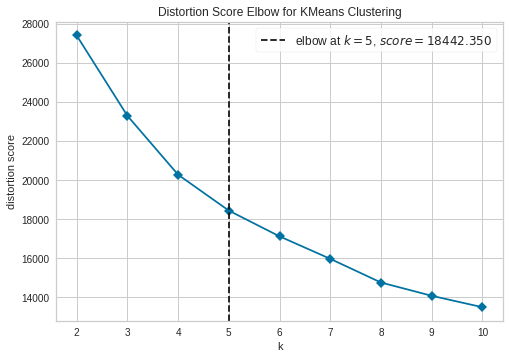

In [ ]:
plot_model(kmeans, plot = 'elbow')

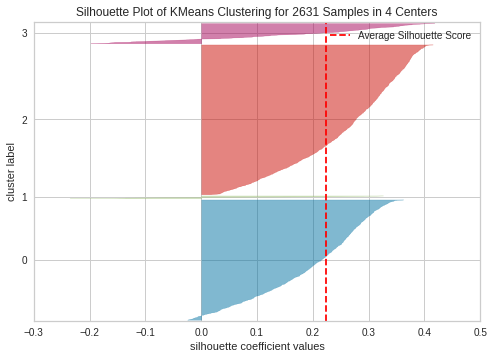

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **5. Interpret results and plan for actions**

In [ ]:
df_csv['cluster'] = kmeans.labels_
df_csv

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,shop_hour,quantity,basket_do_Fr,basket_do_Fresh,basket_do_Grocery,basket_do_Mixed,basket_do_Nonfood,basket_do_XX,basket_type_fullshop,basket_type_Small_Shop,basket_type_Top_Up,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,cluster
0,CUST0000000689,68.75,16,24,2007-07-22,2008-06-23,17.666667,63,0,11.0,5.0,25.0,1,0,1,1,1,0,0,0,0,0,0,4.296875,338,13,0
1,CUST0000001163,5.92,2,6,2006-10-22,2007-02-10,15.333333,11,0,4.0,0.0,2.0,0,0,0,0,1,0,0,0,0,0,0,2.960000,112,512,2
2,CUST0000001194,326.14,71,69,2006-04-22,2008-06-20,17.751445,244,0,87.0,11.0,75.0,0,0,1,1,1,0,0,1,0,0,0,4.593521,791,16,3
3,CUST0000002605,1.80,6,1,2006-10-08,2008-06-12,13.666667,6,0,0.0,6.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0.300000,614,24,0
4,CUST0000002637,37.34,14,15,2006-08-03,2008-05-30,15.041667,28,0,15.0,4.0,5.0,0,0,0,1,1,1,0,0,0,0,0,2.667143,667,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,CUST0000999109,2.52,1,2,2007-06-26,2007-06-26,11.000000,2,0,2.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,2.520000,1,376,2
2627,CUST0000999439,0.70,2,1,2007-08-14,2008-07-05,15.000000,2,0,0.0,2.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0.350000,327,1,0
2628,CUST0000999593,79.30,25,42,2006-05-06,2008-04-02,14.936508,77,0,39.0,4.0,20.0,0,0,1,1,1,0,0,0,0,0,1,3.172000,698,95,0
2629,CUST0000999935,108.17,15,29,2006-11-29,2008-06-05,15.525424,93,0,30.0,2.0,27.0,0,0,1,1,1,0,0,0,0,0,1,7.211333,555,31,0


In [ ]:
df_csv['cluster'].value_counts()

2    1344
0    1079
3     182
1      26
Name: cluster, dtype: int64

In [ ]:
print(f'Cluster 0 : {1079/2631}')
print(f'Cluster 1 : {26/2631}')
print(f'Cluster 2 : {1344/2631}')
print(f'Cluster 3 : {182/2631}')

Cluster 0 : 0.41011022424933485
Cluster 1 : 0.009882174078297225
Cluster 2 : 0.5108323831242874
Cluster 3 : 0.06917521854808058


In [ ]:
df_csv.groupby(by='cluster').median()

,TotalSpend,TotalVisits,TotalSKUs,shop_hour,quantity,basket_do_Fr,basket_do_Fresh,basket_do_Grocery,basket_do_Mixed,basket_do_Nonfood,basket_do_XX,basket_type_fullshop,basket_type_Small_Shop,basket_type_Top_Up,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,38.860,10.0,14.0,15.123457,29.0,0.0,9.0,1.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.685385,644.0,35.0
1,593.735,150.0,75.0,15.582115,440.0,0.0,103.5,28.0,107.5,10.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.975050,810.5,2.0
2,3.500,1.0,2.0,15.500000,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.230000,1.0,385.5
3,423.040,87.0,74.5,14.904215,323.5,0.0,128.0,12.0,88.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.344711,801.5,6.0


In [ ]:
df_csv.groupby(by='cluster').mean()

,TotalSpend,TotalVisits,TotalSKUs,shop_hour,quantity,basket_do_Fr,basket_do_Fresh,basket_do_Grocery,basket_do_Mixed,basket_do_Nonfood,basket_do_XX,basket_type_fullshop,basket_type_Small_Shop,basket_type_Top_Up,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,62.681798,15.241891,17.905468,15.053108,46.819277,0.0,15.858202,3.682113,13.560704,0.481928,0.004634,0.586654,0.796108,0.845227,0.125116,0.056534,0.322521,0.049120,0.159407,0.160334,4.496869,608.049120,54.633920
1,634.990385,159.346154,84.230769,15.168654,474.461538,0.0,147.346154,46.000000,139.153846,12.769231,0.153846,0.807692,1.000000,0.961538,0.076923,0.192308,0.192308,0.115385,0.115385,0.153846,5.110330,799.500000,6.653846
2,7.210379,1.856399,3.430804,15.356565,5.453869,0.0,1.819940,0.511905,1.526042,0.069196,0.001488,0.214286,0.562500,0.475446,0.105655,0.046131,0.354911,0.057292,0.145089,0.159226,3.900775,63.994792,408.249256
3,511.090275,97.214286,77.467033,14.852449,379.873626,0.0,145.686813,16.291209,109.543956,1.434066,0.010989,0.972527,0.934066,1.000000,0.192308,0.060440,0.225275,0.049451,0.131868,0.230769,5.834737,781.862637,8.763736


In [ ]:
df_csv.to_csv(f'cluster (all feature).csv', index=False)

**Result**

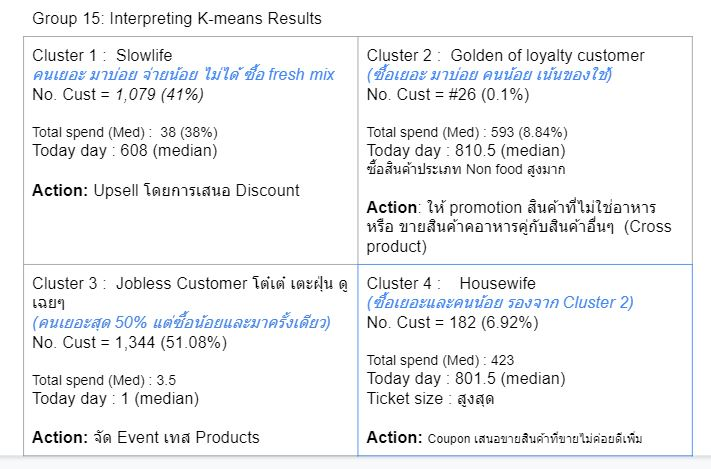